In [33]:
import pandas as pd
import sklearn
import numpy as np

In [34]:
df_train = pd.read_csv('./formated_data/train.csv')
df_train

,county,is_business,product_type,target,is_consumption,data_block_id,row_id,prediction_unit_id,euros_per_mwh,lowest_price_per_mwh,highest_price_per_mwh,year,month,day,hour
0,14,1,3,180.511,0,16,48790,56,110.09,47.09,48.62,2021,9,17,15
1,7,0,1,43.490,1,51,153919,25,154.89,67.01,68.78,2021,10,22,20
2,10,0,1,1.823,0,69,207746,38,65.09,65.00,75.99,2021,11,9,15
3,9,1,1,61.196,1,123,371717,36,117.64,75.00,90.00,2022,1,2,19
4,1,0,3,214.931,0,251,778486,7,183.91,98.00,104.12,2022,5,10,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5,1,1,168.353,0,591,1870136,22,70.36,46.50,60.00,2023,4,15,10
9996,5,1,0,40.860,1,325,1014639,21,145.66,159.74,200.00,2022,7,23,3
9997,9,0,1,22.459,1,367,1149565,34,204.12,219.99,235.98,2022,9,3,16
9998,2,1,1,37.480,1,341,1065697,65,382.92,184.00,207.00,2022,8,8,6


In [35]:
 # Drop 
df_train = df_train[df_train['target'].isna() == False]
df_train = df_train[df_train['euros_per_mwh'].isna() == False]
df_train = df_train[df_train['lowest_price_per_mwh'].isna() == False]
df_train = df_train[df_train['highest_price_per_mwh'].isna() == False]
df_train.describe()

,county,is_business,product_type,target,is_consumption,data_block_id,row_id,prediction_unit_id,euros_per_mwh,lowest_price_per_mwh,highest_price_per_mwh,year,month,day,hour
count,9959.000000,9959.000000,9959.000000,9959.000000,9959.000000,9959.000000,9.959000e+03,9959.000000,9959.000000,9959.000000,9959.000000,9959.000000,9959.000000,9959.000000,9959.000000
mean,7.297821,0.531479,1.901797,278.021151,0.493423,321.181143,1.006912e+06,33.072096,157.869716,95.730117,108.653294,2022.054222,6.441811,15.604780,11.583593
std,4.789720,0.499033,1.079951,925.621791,0.499982,181.039567,5.776386e+05,19.647415,121.179830,47.066367,54.167743,0.640778,3.690448,8.749616,6.911719
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.810000e+02,0.000000,-10.060000,28.100000,34.000000,2021.000000,1.000000,1.000000,0.000000
25%,3.000000,0.000000,1.000000,0.321000,0.000000,166.000000,5.042945e+05,16.000000,86.340000,61.750000,67.760000,2022.000000,3.000000,8.000000,6.000000
50%,7.000000,1.000000,2.000000,30.229000,0.000000,322.000000,1.006775e+06,33.000000,130.010000,86.000000,94.000000,2022.000000,6.000000,16.000000,12.000000
75%,11.000000,1.000000,3.000000,181.393000,1.000000,476.000000,1.504046e+06,50.000000,199.970000,110.000000,133.000000,2022.000000,10.000000,23.000000,18.000000
max,15.000000,1.000000,3.000000,14689.333000,1.000000,635.000000,2.011820e+06,68.000000,4000.000000,250.000000,305.000000,2023.000000,12.000000,31.000000,23.000000


# Train - Test

In [65]:
from sklearn.model_selection import train_test_split
X = df_train.drop('target', axis=1)
y = df_train['target']

def spliting_dataset(test_ratio=0.2, random_state_nb=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_ratio, random_state=random_state_nb)
    return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = spliting_dataset()

# Modelisation

## Evaluation
Creating a function to test all the errors on each model, just by calling this function.

In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error, r2_score

def getMAE(model, X_test, y_test):
    mae = mean_absolute_error(y_test, model.predict(X_test))
    return round(mae, 4)

def model_evaluation(model_trained, test_evaluation=False):
    if test_evaluation:
        temp_y_pred = model_trained.predict(X_test)
    else:
        temp_y_pred = model_trained.predict(X_train)
    
    y_data = y_test if test_evaluation else y_train
    
    print("######## Test evaluation") if test_evaluation else print("######## Train evaluation")
    print(f'R2 score: {round(r2_score(y_data, temp_y_pred), 4)} (aiming 1.0)')
    print(f"Mean absolute error : {round(mean_absolute_error(y_data, temp_y_pred), 4)} (aiming 0)")
    print(f"Mean squared error : {round(mean_squared_error(y_data, temp_y_pred), 4)} (aiming 0)")
    # print(f"Mean absolute percentage error : {mean_absolute_percentage_error(y_data, temp_y_pred)}\n")

## Dummy
Creating a dummy regressor to compare our model with this dummy one. 
And see if the actual model is worth using or no any better than a dummy one

In [85]:
from sklearn.dummy import DummyRegressor
# Model training
dummy = DummyRegressor().fit(X_train, y_train)
better_dummy_mae = getMAE(dummy, X_test, y_test)

# Evaluating model
model_evaluation(dummy)
model_evaluation(dummy, True)

######## Train evaluation
R2 score: 0.0 (aiming 1.0)
Mean absolute error : 363.0738 (aiming 0)
Mean squared error : 803800.2244 (aiming 0)
######## Test evaluation
R2 score: -0.0004 (aiming 1.0)
Mean absolute error : 382.708 (aiming 0)
Mean squared error : 936167.1861 (aiming 0)


## LinearRegression

In [78]:
from sklearn.linear_model import LinearRegression
# Model training
better_reg_model = LinearRegression().fit(X_train, y_train)
better_reg_mae = getMAE(better_reg_model, X_test, y_test)
for i in range(1, 5):
    X_train, X_test, y_train, y_test = spliting_dataset(test_ratio=i/10)
    for j in range(1000):
        reg = LinearRegression(n_jobs=j).fit(X_train, y_train)
        
        # Checking if the mean absolute error is better or not
        tmp_mae = getMAE(reg, X_test, y_test)
        if tmp_mae < better_mae:
            better_mae = tmp_mae
            better_reg_model = reg

# Evaluating model
model_evaluation(better_reg_model)
model_evaluation(better_reg_model, True)

######## Train evaluation
R2 score: 0.1282 (aiming 1.0)
Mean absolute error : 361.6494 (aiming 0)
Mean squared error : 700717.1737 (aiming 0)
######## Test evaluation
R2 score: 0.1193 (aiming 1.0)
Mean absolute error : 380.7231 (aiming 0)
Mean squared error : 824121.1177 (aiming 0)


## Lasso

In [90]:
from sklearn.linear_model import Lasso
# Model training
better_lasso_model = Lasso().fit(X_train, y_train)
better_lasso_mae = getMAE(better_lasso_model, X_test, y_test)
for i in range(1, 5):
    X_train, X_test, y_train, y_test = spliting_dataset(test_ratio=i/10)
    for j in range(1000):
        reg = Lasso(alpha=j, selection="random").fit(X_train, y_train)
        
        # Checking if the mean absolute error is better or not
        tmp_mae = getMAE(reg, X_test, y_test)
        if tmp_mae < better_mae:
            better_lasso_mae = tmp_mae
            better_lasso_model = reg

# Evaluating model
model_evaluation(better_lasso_model)
model_evaluation(better_lasso_model, True)

C:\Users\busin\Documents\dev\python\enefit_data_pycharm\.venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.009e+09, tolerance: 4.803e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\busin\Documents\dev\python\enefit_data_pycharm\.venv\lib\site-packages\sklearn\base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\busin\Documents\dev\python\enefit_data_pycharm\.venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\busin\Documents\dev\python\enefit_data_pycharm\.venv\l

######## Train evaluation
R2 score: 0.012 (aiming 1.0)
Mean absolute error : 359.874 (aiming 0)
Mean squared error : 794187.1855 (aiming 0)
######## Test evaluation
R2 score: 0.0087 (aiming 1.0)
Mean absolute error : 379.2963 (aiming 0)
Mean squared error : 927680.2185 (aiming 0)


## Elastic Net

In [137]:
from sklearn.linear_model import ElasticNet
# Model training
better_elastic_model = ElasticNet().fit(X_train, y_train)
better_elastic_mae = getMAE(better_elastic_model, X_test, y_test)
for i in range(1, 5):
    X_train, X_test, y_train, y_test = spliting_dataset(test_ratio=i/10)
    for j in range(1, 1000):
        reg = ElasticNet(alpha=j, tol=1).fit(X_train, y_train)
        
        # Checking if the mean absolute error is better or not
        tmp_mae = getMAE(reg, X_test, y_test)
        if tmp_mae < better_mae:
            better_elastic_mae = tmp_mae
            better_elastic_model = reg

# Evaluating model
model_evaluation(better_elastic_model)
model_evaluation(better_elastic_model, True)

C:\Users\busin\Documents\dev\python\enefit_data_pycharm\.venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.187e+09, tolerance: 4.803e+05
  model = cd_fast.enet_coordinate_descent(


######## Train evaluation
R2 score: 0.0124 (aiming 1.0)
Mean absolute error : 359.871 (aiming 0)
Mean squared error : 793843.0078 (aiming 0)
######## Test evaluation
R2 score: 0.0091 (aiming 1.0)
Mean absolute error : 379.4305 (aiming 0)
Mean squared error : 927252.6351 (aiming 0)


## Random Forest

In [139]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameters
grid_param = {'n_estimators': [500, 800, 1500, 2500, 5000], 
              'max_features': ["auto", "sqrt", "log2"],
              'max_depth': [10, 20, 30, 40, 50], 
              'min_samples_split': [2, 5, 10, 15, 20], 
              'min_samples_leaf':[1, 2, 5, 10, 15]}

# Model training
forest = RandomForestRegressor()
RFR_random = RandomizedSearchCV(estimator=forest, param_distributions=grid_param, n_iter=500, cv=5, verbose=2, random_state=42, n_jobs=-1)
RFR_random.fit(X_train, y_train)
better_rdm_forest_mae = getMAE(RFR_random, X_test, y_test)
# Evaluating model
model_evaluation(forest)
model_evaluation(forest, True)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


KeyboardInterrupt: 

## Xgboost

In [89]:
from xgboost import XGBRegressor
bst = XGBRegressor().fit(X_train, y_train)
better_xgb_mae = getMAE(bst, X_test, y_test)

model_evaluation(bst)
model_evaluation(bst, True)


######## Train evaluation
R2 score: 0.9917 (aiming 1.0)
Mean absolute error : 49.1518 (aiming 0)
Mean squared error : 6692.6493 (aiming 0)
######## Test evaluation
R2 score: 0.8641 (aiming 1.0)
Mean absolute error : 146.768 (aiming 0)
Mean squared error : 127154.1872 (aiming 0)


# Analyses

              Model       MAE
0             Dummy  382.7080
1  LinearRegression  380.7231
2             Lasso  379.2963
3       Elastic Net  379.4305
4      RandomForest  116.0695
5           XGBoost  146.7680


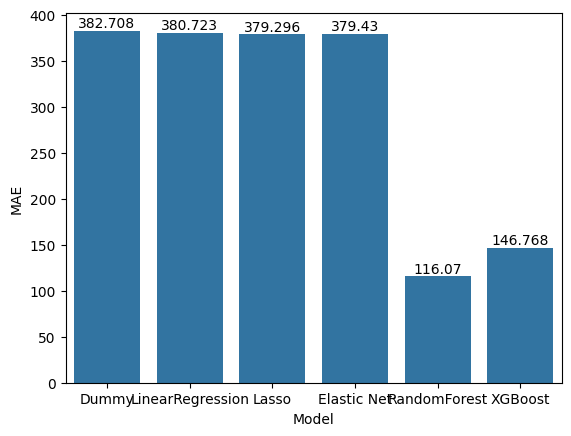

In [138]:
import seaborn as sns

# Creating a temporary dataframe for MAE errors
d = {"Model" : ["Dummy", "LinearRegression", "Lasso", "Elastic Net","RandomForest", "XGBoost"],
     "MAE" : [better_dummy_mae, better_reg_mae, better_lasso_mae, better_elastic_mae, better_rdm_forest_mae, better_xgb_mae]}
mae_array = pd.DataFrame(data=d, columns=["Model", "MAE"])
print(mae_array)

# Creating the graph
ax = sns.barplot(mae_array, x="Model", y="MAE")
ax.bar_label(ax.containers[0], fontsize=10);